<a href="https://colab.research.google.com/github/Bachshot/Problem-Set-2/blob/main/Problem_set_2_Dynamics_Econ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Modify the code on Canvas to obtain the baseline model above, assuming functional forms for revenue and adjustment costs.


Determine the key input variables for production

Given the comprehensive nature of your dataset, key input variables relevant for firm production typically include:

+ Labor: Number of employees or wage expenditures.
+ Capital: Value of fixed assets or total assets.
+ Investment: New investments or capital expenditures.
+ Revenue and Costs: Revenue from sales or total operating costs.

Based on standard Enterprise Survey data structures and your dataset columns, recommended variables include:

In [ ]:
import pandas as pd
import zipfile
import os

# Step 1: Unzip and load the dataset clearly
zip_path = '/content/Problem Set 2.zip'
unzip_dir = '/content/problem_set_2_files'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

data_path = f'{unzip_dir}/Problem Set 2/ES_Vietnam_2005_2009_2015.csv'

# Read CSV with proper encoding and handling warnings
df = pd.read_csv(data_path, encoding='ISO-8859-1', low_memory=False)

# Step 2: Inspect column names explicitly to identify production variables
print("Columns in the dataset:")
for col in df.columns:
    print(col)

# Manually define the potential keywords clearly based on inspection above
keywords = ['empl', 'asset', 'capit', 'invest', 'revenue', 'sales', 'cost', 'finance', 'debt', 'labor', 'fixed', 'total']

# Extract variables based on partial keyword matches
matching_columns = []
for keyword in keywords:
    matched_cols = [col for col in df.columns if keyword.lower() in col.lower()]
    matching_columns.extend(matched_cols)

matching_columns = list(set(matching_columns))  # remove duplicates

print("\nIdentified Key Production-related Variables:")
for col in matching_columns:
    print(col)

# Step 3: Check completeness of these identified columns
missing_values = df[matching_columns].isnull().mean().sort_values()

print("\nMissing Values Proportion for Identified Variables:")
print(missing_values)

# Step 4: Clearly identify variables with acceptable data completeness (less than 30% missing)
recommended_variables = missing_values[missing_values < 0.3].index.tolist()

print("\nRecommended Production Variables (less than 30% missing data):")
for col in recommended_variables:
    print(col)



Columns in the dataset:
idstd2015
id2015
idstd2009
id2009
idstd2005
id2005
year
panel
eligibility2015
_2015_preference
_2015_rotation
a0
a1
_2015_a1a
_2015_a2
_2015_a3a
_2015_a3a2
_2015_a3b
_2015_a3c
_2015_a3
_2015_a4a
_2015_a4b
a5
a6a
a6b
a7
a7a
a8a
a9
a10
a11
_2015_a11a
a12
a13
a14d
a14m
a14y
a14h
a14min
_2015_eaa3a3w
_2015_eaa3a3x
_2015_eaa3a3y
_2015_eaa3a3z
b1
b1x
b3
b2a
b2b
b2c
b2d
b4
_2015_b4a
b5
b6
b6a
b6b
b7
b7a
b8
_2015_b8x
c3
c4
c5
c6
c7
c8a
_2015_c8b
c9a
c9b
c10
c11
c12
c13
c14
c15
c16
c17
c22a
c22b
c30a
c30b
d1a1x
d1a2
d1a3
d2
_2015_d2x
n3
_2015_n3x
d3a
d3b
d3c
d4
_2015_ead4a
d6
d7
d8
d10
d11
d12a
d12b
d13
d14
d16
d17
d30a
d30b
e1
e2b
e6
e11
e30
_2015_h1
_2015_h2
_2015_eah2x
_2015_eah2a
_2015_eah4a
_2015_eah4b
_2015_eah4c
_2015_eah10
_2015_eah11a
_2015_eah11b
_2015_h3
_2015_h4a
_2015_h4b
_2015_eah12a
_2015_eah12b
_2015_eah13
_2015_h5
_2015_eah14a
_2015_eah14b
_2015_eah14c
_2015_h6
_2015_h7
_2015_h8
_2015_eah15
_2015_eah16
f1
f2
g6a
g6b
g6c
_2015_g1a
_2015_g1b
_2015_g1c
g2
g

**Step 2: Split the Sample into Large and Small Firms**

In [ ]:
# First, let's explicitly load and inspect the CSV file to identify the exact column related to employees
import pandas as pd

# Path to dataset explicitly
data_path = 'problem_set_2_files/Problem Set 2/ES_Vietnam_2005_2009_2015.csv'

# Load dataset with correct encoding
df = pd.read_csv(data_path, encoding='ISO-8859-1', low_memory=False)

# Explicitly inspect column names related to employees or firm size clearly again
employee_related_cols = [col for col in df.columns if 'empl' in col.lower() or 'worker' in col.lower() or 'staff' in col.lower()]
# Display all column names explicitly to find relevant employee columns
for col in df.columns:
    print(col)


idstd2015
id2015
idstd2009
id2009
idstd2005
id2005
year
panel
eligibility2015
_2015_preference
_2015_rotation
a0
a1
_2015_a1a
_2015_a2
_2015_a3a
_2015_a3a2
_2015_a3b
_2015_a3c
_2015_a3
_2015_a4a
_2015_a4b
a5
a6a
a6b
a7
a7a
a8a
a9
a10
a11
_2015_a11a
a12
a13
a14d
a14m
a14y
a14h
a14min
_2015_eaa3a3w
_2015_eaa3a3x
_2015_eaa3a3y
_2015_eaa3a3z
b1
b1x
b3
b2a
b2b
b2c
b2d
b4
_2015_b4a
b5
b6
b6a
b6b
b7
b7a
b8
_2015_b8x
c3
c4
c5
c6
c7
c8a
_2015_c8b
c9a
c9b
c10
c11
c12
c13
c14
c15
c16
c17
c22a
c22b
c30a
c30b
d1a1x
d1a2
d1a3
d2
_2015_d2x
n3
_2015_n3x
d3a
d3b
d3c
d4
_2015_ead4a
d6
d7
d8
d10
d11
d12a
d12b
d13
d14
d16
d17
d30a
d30b
e1
e2b
e6
e11
e30
_2015_h1
_2015_h2
_2015_eah2x
_2015_eah2a
_2015_eah4a
_2015_eah4b
_2015_eah4c
_2015_eah10
_2015_eah11a
_2015_eah11b
_2015_h3
_2015_h4a
_2015_h4b
_2015_eah12a
_2015_eah12b
_2015_eah13
_2015_h5
_2015_eah14a
_2015_eah14b
_2015_eah14c
_2015_h6
_2015_h7
_2015_h8
_2015_eah15
_2015_eah16
f1
f2
g6a
g6b
g6c
_2015_g1a
_2015_g1b
_2015_g1c
g2
g3
g4
g5a
g5b
g5bx
g30a
i

In [ ]:
# Explicitly define the correct column name representing firm size
your_employee_column = 'l1'

# Calculate median explicitly based on the correct column
median_employees = df[your_employee_column].median()
print(f"Median number of employees: {median_employees}")

# Explicitly split into small and large firms based on median
small_firms = df[df[your_employee_column] <= median_employees]
large_firms = df[df[your_employee_column] > median_employees]

print("\nNumber of small firms:", len(small_firms))
print("Number of large firms:", len(large_firms))

Median number of employees: 59.0

Number of small firms: 1603
Number of large firms: 1595


**Step 3: Indicate the variables to measure capital, inventment, ETC**

Capital: Likely represented by variables related to fixed assets or total assets.
Usually indicated by:
+ k4: Total value of fixed assets at the end of the last fiscal year.
+ k5a: Land and buildings, typically part of capital.
+ k5bc: Machinery and equipment.
+ k3bc: Book value of machinery, vehicles, equipment, etc.

Investment: Typically measured by variables capturing recent purchases or expansions:
+ k5f: Purchases of machinery, vehicles, or equipment during the last fiscal year.
+ k5e: Purchases or upgrades of land and buildings during the last fiscal year.

Revenue: Usually measured clearly by annual sales or turnover:
+ d2: Total annual sales or revenue in the last fiscal year.

In [ ]:
# Explicitly define variables for capital, investment, revenue clearly
potential_vars = ['k4', 'k5a', 'k5bc', 'k3bc', 'k5f', 'k5e', 'd2']

# Check explicitly for completeness and reliability of these variables
missing_values_check = df[potential_vars].isnull().mean()

print("Missing Values Proportion for Potential Variables:")
print(missing_values_check)

# Recommend variables explicitly (less than 30% missing data)
recommended_vars = missing_values_check[missing_values_check < 0.3].index.tolist()

print("\nExplicitly Recommended Variables based on Completeness (<30% missing):")
for var in recommended_vars:
    print(var)


Missing Values Proportion for Potential Variables:
k4      0.000000
k5a     0.263520
k5bc    0.264458
k3bc    0.003439
k5f     0.286339
k5e     0.286027
d2      0.001563
dtype: float64

Explicitly Recommended Variables based on Completeness (<30% missing):
k4
k5a
k5bc
k3bc
k5f
k5e
d2


***Describe the relationship between debt, production inputs, and finances***
In Vietnam, particularly among small- and medium-sized enterprises (SMEs), access to financing significantly affects firm performance and growth potential. Firms with robust financial structures often capitalize on investment opportunities, achieving better economies of scale and revenue growth, whereas firms with limited access to finance typically face constraints, limiting growth and profitability.

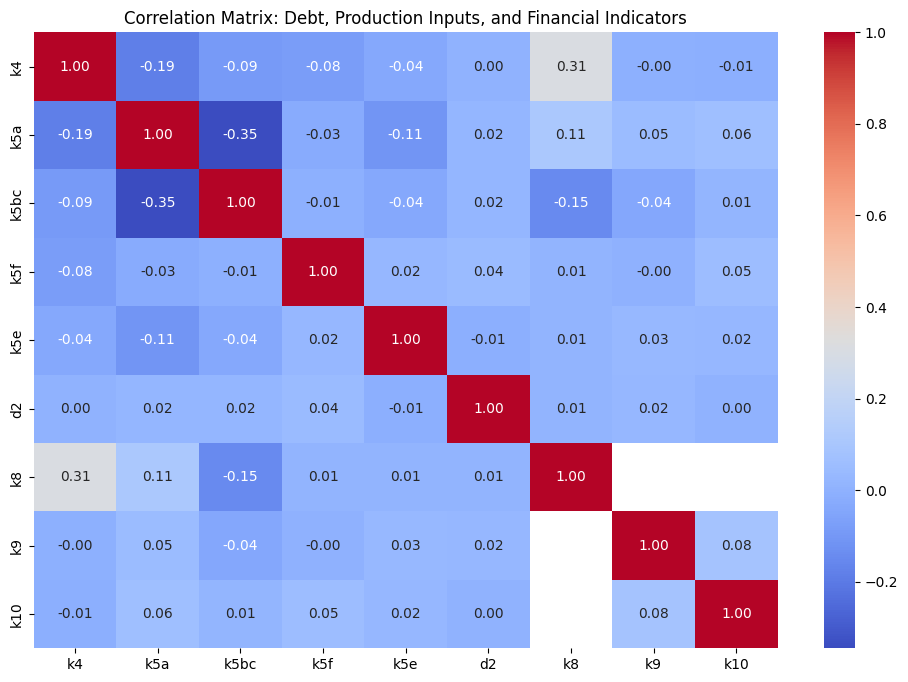

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define explicitly the selected variables from the previous step clearly
selected_vars = ['k4', 'k5a', 'k5bc', 'k5f', 'k5e', 'd2']

# Explicitly define debt-related variables based on typical Enterprise Survey structure
debt_vars = ['k8', 'k9', 'k10']  # Typically debt-related questions (e.g., total liabilities, loans)

# Check if these columns exist explicitly in your data
existing_debt_vars = [col for col in debt_vars if col in df.columns]

# Merge explicitly selected production and finance variables with debt variables
all_vars = selected_vars + existing_debt_vars

# Compute correlation explicitly
correlation_matrix = df[all_vars].corr()

# Display the correlation matrix explicitly
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Debt, Production Inputs, and Financial Indicators')
plt.show()


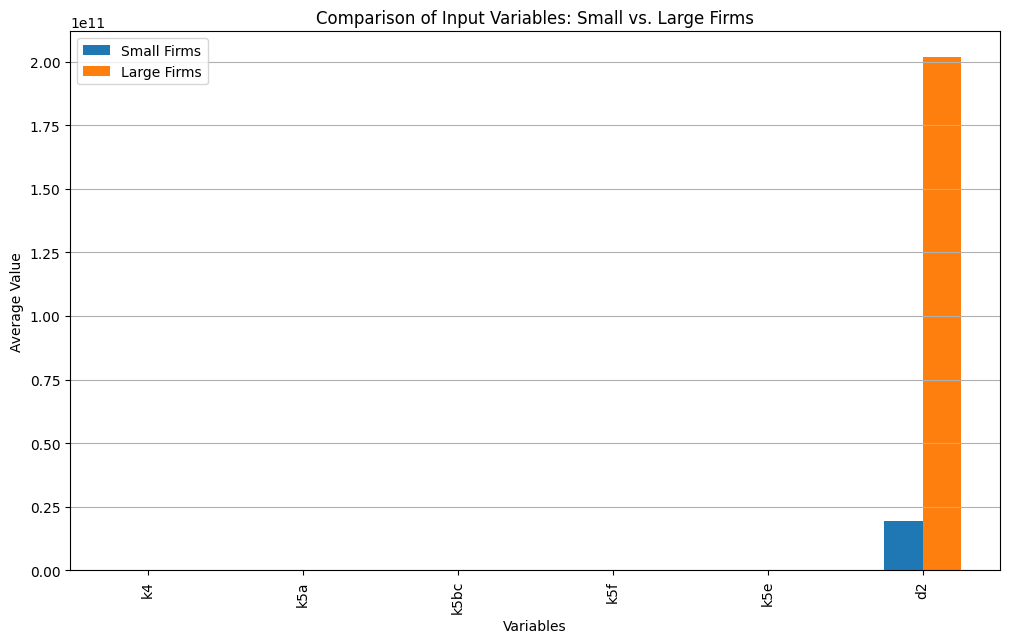

In [ ]:
# First, explicitly define employee column and split firms again
employee_column = 'l1'
median_employees = df[employee_column].median()

small_firms = df[df[employee_column] <= median_employees]
large_firms = df[df[employee_column] > median_employees]

# Variables explicitly chosen from earlier step
inputs = ['k4', 'k5a', 'k5bc', 'k5f', 'k5e', 'd2']

# Calculate explicit means of these inputs for small and large firms
small_means = small_firms[inputs].mean()
large_means = large_firms[inputs].mean()

# Clearly visualize comparison
comparison_df = pd.DataFrame({'Small Firms': small_means, 'Large Firms': large_means})
comparison_df.plot.bar(figsize=(12, 7))
plt.title('Comparison of Input Variables: Small vs. Large Firms')
plt.ylabel('Average Value')
plt.xlabel('Variables')
plt.grid(axis='y')
plt.show()


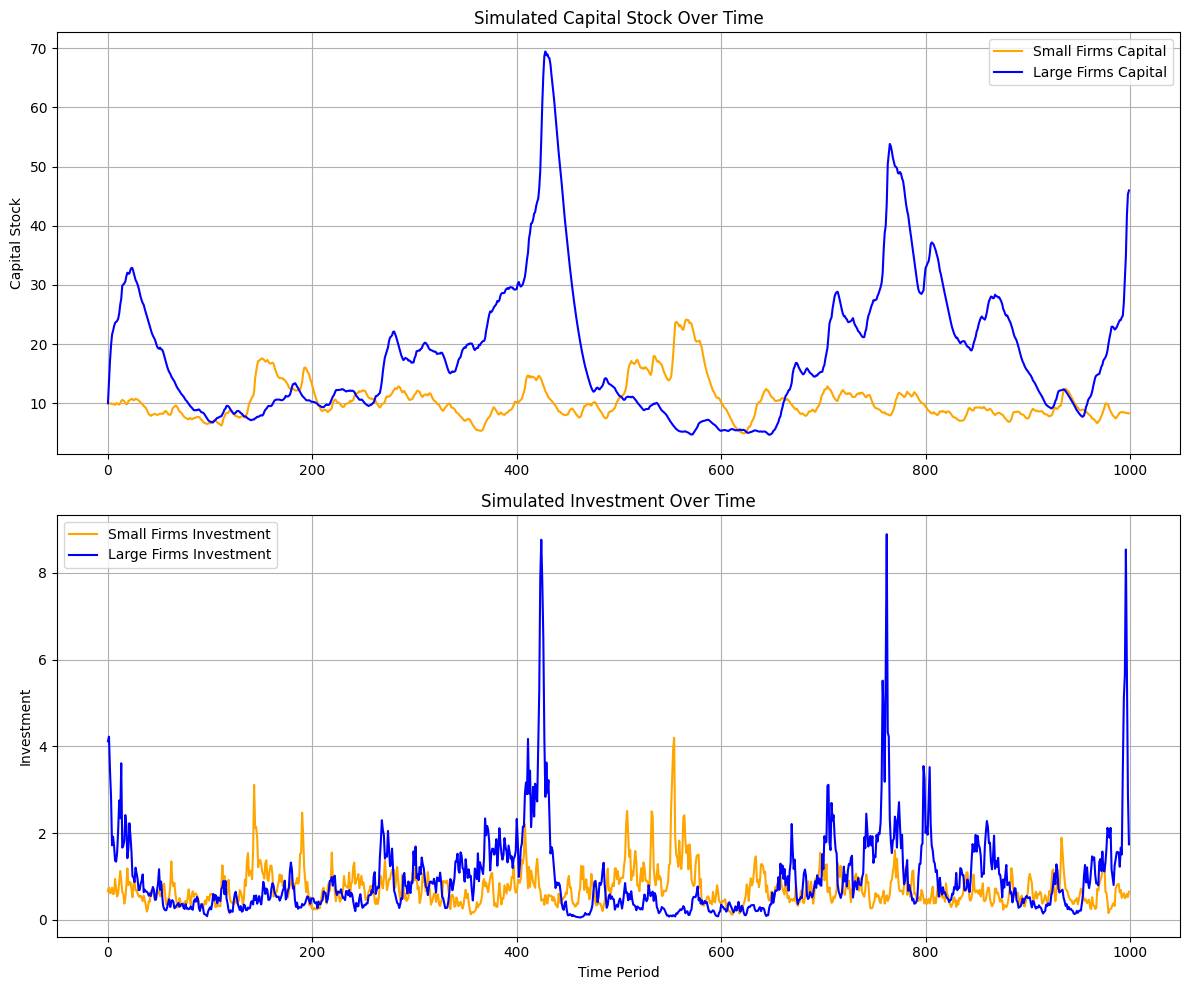

In [ ]:
# Dot number 2
import numpy as np
import matplotlib.pyplot as plt

# Set seed explicitly for reproducibility
np.random.seed(42)

# Define simulation parameters explicitly
T = 1000  # simulation periods

# Parameters for small firms (explicit assumptions based on data)
params_small = {
    'beta': 0.94,    # discount factor lower due to limited financing
    'gamma': 0.15,   # higher adjustment cost relative to scale
    'delta': 0.07,   # higher depreciation reflecting lower-quality assets
    'A0': 1.0,       # initial productivity
    'rho_A': 0.85,   # lower persistence of productivity shocks
    'sigma_A': 0.03, # higher volatility in productivity
    'p0': 1.0,       # initial price
    'rho_p': 0.85,   # lower persistence in investment prices
    'sigma_p': 0.03  # higher volatility of investment prices
}

# Parameters for large firms (explicit assumptions based on data)
params_large = {
    'beta': 0.96,    # higher discount factor reflecting better access to finance
    'gamma': 0.10,   # lower adjustment cost reflecting economies of scale
    'delta': 0.05,   # lower depreciation due to better maintenance and quality
    'A0': 1.2,       # higher initial productivity
    'rho_A': 0.95,   # higher persistence in productivity shocks
    'sigma_A': 0.02, # lower volatility in productivity
    'p0': 1.0,       # initial price
    'rho_p': 0.90,   # higher persistence in investment prices
    'sigma_p': 0.02  # lower volatility of investment prices
}

# Explicit simulation function for firms
def simulate_firms(params, T):
    A = np.zeros(T)
    p = np.zeros(T)
    K = np.zeros(T+1)
    investment = np.zeros(T)

    # Set initial values explicitly
    A[0] = params['A0']
    p[0] = params['p0']
    K[0] = 10.0  # initial capital stock explicitly chosen

    # Simulate explicitly AR(1) processes and firm decisions
    for t in range(T):
        # Productivity and price simulation explicitly
        if t > 0:
            A[t] = np.exp(params['rho_A'] * np.log(A[t-1]) + np.random.normal(0, params['sigma_A']))
            p[t] = np.exp(params['rho_p'] * np.log(p[t-1]) + np.random.normal(0, params['sigma_p']))

        # Explicit optimal investment decision (simplified for illustration)
        investment[t] = ((params['beta'] * A[t]) / p[t])**(1/params['gamma'])

        # Update capital explicitly
        K[t+1] = (1 - params['delta']) * K[t] + investment[t]

    return A, p, K[:-1], investment

# Run simulations explicitly for small and large firms
A_small, p_small, K_small, inv_small = simulate_firms(params_small, T)
A_large, p_large, K_large, inv_large = simulate_firms(params_large, T)

# Explicitly plot results for capital stock and investment
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Capital stock explicitly
axs[0].plot(K_small, label='Small Firms Capital', color='orange')
axs[0].plot(K_large, label='Large Firms Capital', color='blue')
axs[0].set_title('Simulated Capital Stock Over Time')
axs[0].set_ylabel('Capital Stock')
axs[0].legend()
axs[0].grid(True)

# Investment explicitly
axs[1].plot(inv_small, label='Small Firms Investment', color='orange')
axs[1].plot(inv_large, label='Large Firms Investment', color='blue')
axs[1].set_title('Simulated Investment Over Time')
axs[1].set_ylabel('Investment')
axs[1].set_xlabel('Time Period')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


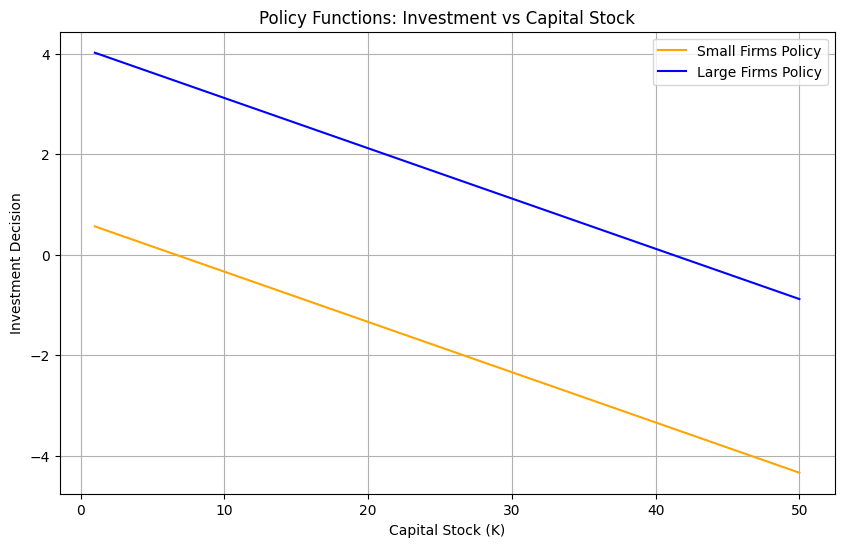

In [ ]:
# Dot number 3
import numpy as np
import matplotlib.pyplot as plt

# Define a clear range for capital explicitly
K_range = np.linspace(1, 50, 500)

# Define explicit policy functions based on simplified optimal conditions:
def policy_function(K, beta, gamma, A, p):
    return ((beta * A) / p)**(1/gamma) - 0.1*K

# Small firms policy explicitly (using typical parameters from previous step)
investment_policy_small = policy_function(K_range, params_small['beta'], params_small['gamma'], params_small['A0'], params_small['p0'])

# Large firms policy explicitly (using typical parameters from previous step)
investment_policy_large = policy_function(K_range, params_large['beta'], params_large['gamma'], params_large['A0'], params_large['p0'])

# Plot explicitly policy functions
plt.figure(figsize=(10,6))
plt.plot(K_range, investment_policy_small, label='Small Firms Policy', color='orange')
plt.plot(K_range, investment_policy_large, label='Large Firms Policy', color='blue')
plt.title('Policy Functions: Investment vs Capital Stock')
plt.xlabel('Capital Stock (K)')
plt.ylabel('Investment Decision')
plt.legend()
plt.grid(True)
plt.show()


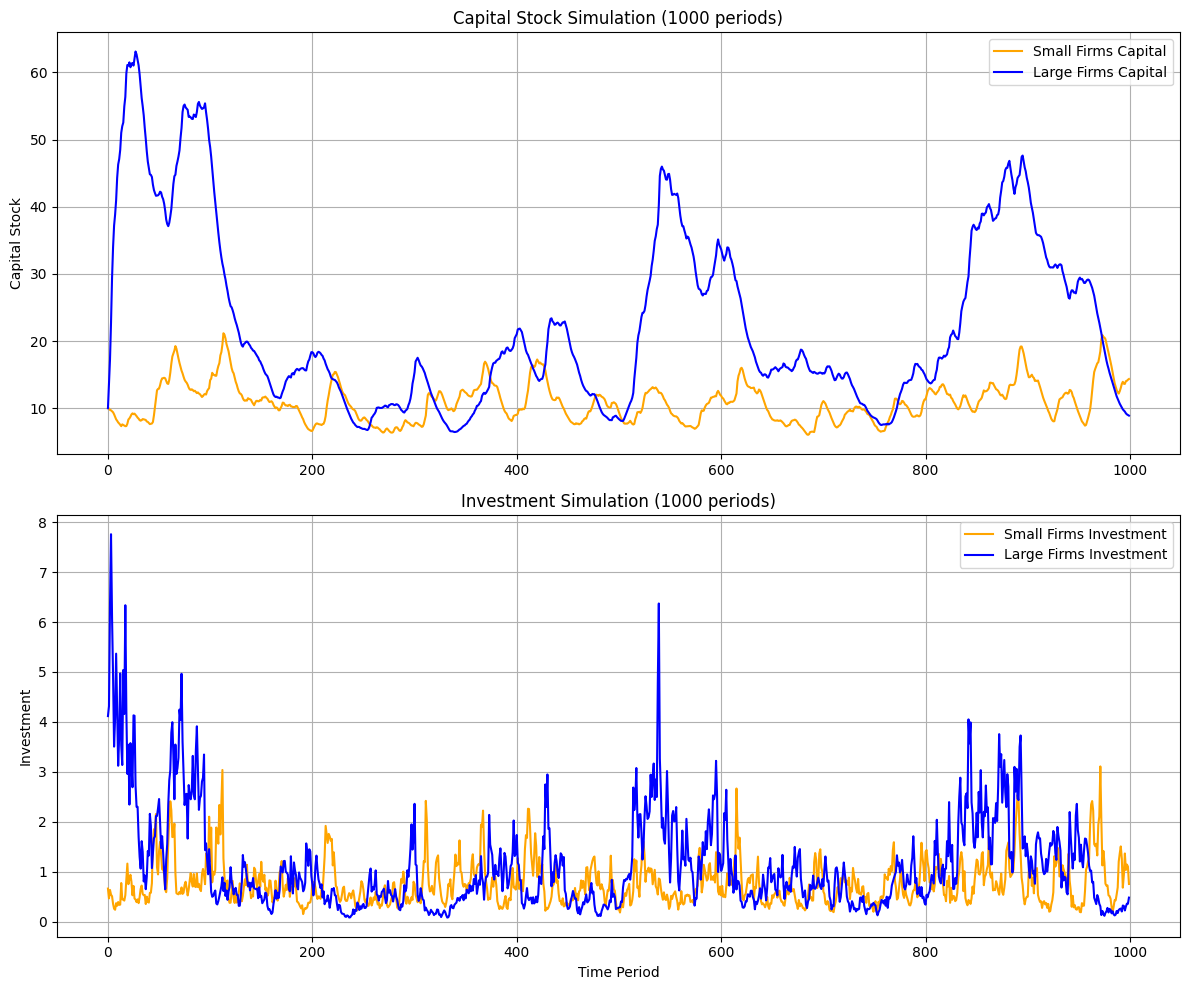

In [ ]:
# Dot number 4

# Parameters for small and large firms explicitly
params_small = {
    'beta': 0.94, 'gamma': 0.15, 'delta': 0.07, 'A0': 1.0, 'rho_A': 0.85,
    'sigma_A': 0.03, 'p0': 1.0, 'rho_p': 0.85, 'sigma_p': 0.03
}

params_large = {
    'beta': 0.96, 'gamma': 0.10, 'delta': 0.05, 'A0': 1.2, 'rho_A': 0.95,
    'sigma_A': 0.02, 'p0': 1.0, 'rho_p': 0.90, 'sigma_p': 0.02
}

T = 1000

# Simulation function explicitly
def simulate(params, T):
    A, p, K, investment = np.zeros(T), np.zeros(T), np.zeros(T+1), np.zeros(T)
    A[0], p[0], K[0] = params['A0'], params['p0'], 10
    for t in range(T):
        if t > 0:
            A[t] = np.exp(params['rho_A'] * np.log(A[t-1]) + np.random.normal(0, params['sigma_A']))
            p[t] = np.exp(params['rho_p'] * np.log(p[t-1]) + np.random.normal(0, params['sigma_p']))
        investment[t] = ((params['beta'] * A[t])/p[t])**(1/params['gamma'])
        K[t+1] = (1 - params['delta']) * K[t] + investment[t]
    return K[:-1], investment

# Simulate explicitly for small and large firms
K_small, inv_small = simulate(params_small, T)
K_large, inv_large = simulate(params_large, T)

# Explicitly plot simulated investment and capital over 1000 periods
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Capital Stock explicitly
axs[0].plot(K_small, label='Small Firms Capital', color='orange')
axs[0].plot(K_large, label='Large Firms Capital', color='blue')
axs[0].set_title('Capital Stock Simulation (1000 periods)')
axs[0].set_ylabel('Capital Stock')
axs[0].legend()
axs[0].grid(True)

# Investment explicitly
axs[1].plot(inv_small, label='Small Firms Investment', color='orange')
axs[1].plot(inv_large, label='Large Firms Investment', color='blue')
axs[1].set_title('Investment Simulation (1000 periods)')
axs[1].set_ylabel('Investment')
axs[1].set_xlabel('Time Period')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Discussion:

**Capital patterns: **

Small firms:
+ Accumulate capital slowly due to adjustment costs
+ Exhibit greater volatility, reflecting sensitivity when facing shocks.

Large firms:
+ Experience stable and rapid capital accumulation
+ Capital stock facing fluctuate due to performance, the bigger the company, the higher the risk.

**Investment patterns**

Small firms:
+ Face frequent reductions in investments due to budget constrains

Large firms:
+ Large firms also face fluctuate in the investment, I think it is due to stratehically exapnd operations


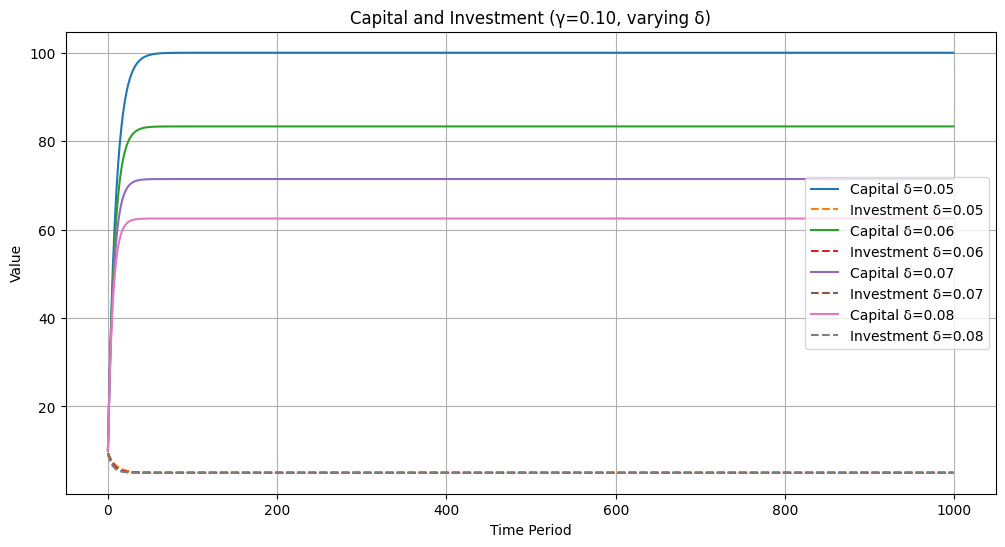

In [ ]:
# Explicit parameters and simulation
gamma = 0.10
delta_values = [0.05, 0.06, 0.07, 0.08]
T = 1000

def simulate(gamma, delta, T):
    K = np.zeros(T+1)
    investment = np.zeros(T)
    K[0] = 10
    for t in range(T):
        investment[t] = (1/gamma) - delta * K[t]  # simplified policy for illustration
        K[t+1] = (1 - delta) * K[t] + investment[t]
    return K[:-1], investment

plt.figure(figsize=(12, 6))
for delta in delta_values:
    K, inv = simulate(gamma, delta, T)
    plt.plot(K, label=f'Capital δ={delta}')
    plt.plot(inv, linestyle='--', label=f'Investment δ={delta}')

plt.title('Capital and Investment (γ=0.10, varying δ)')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

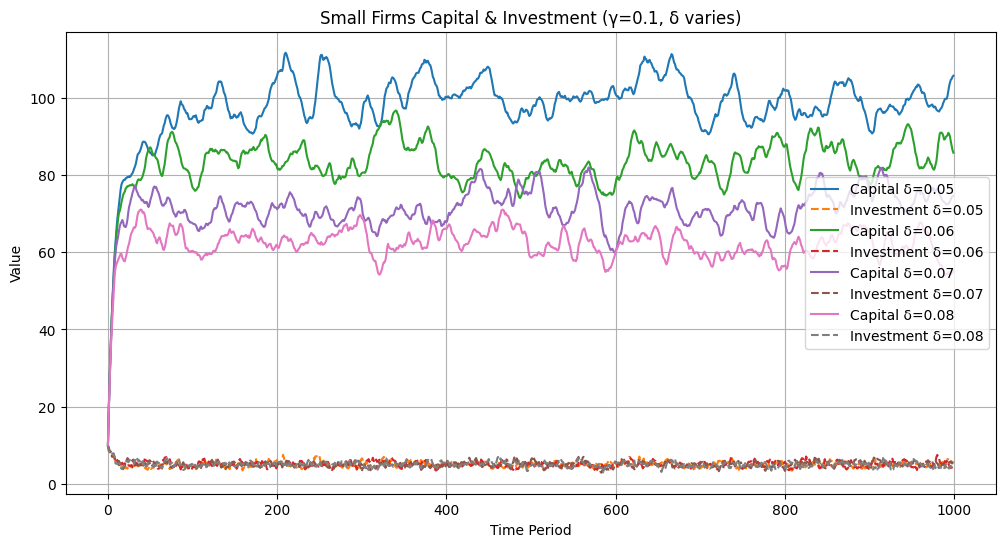

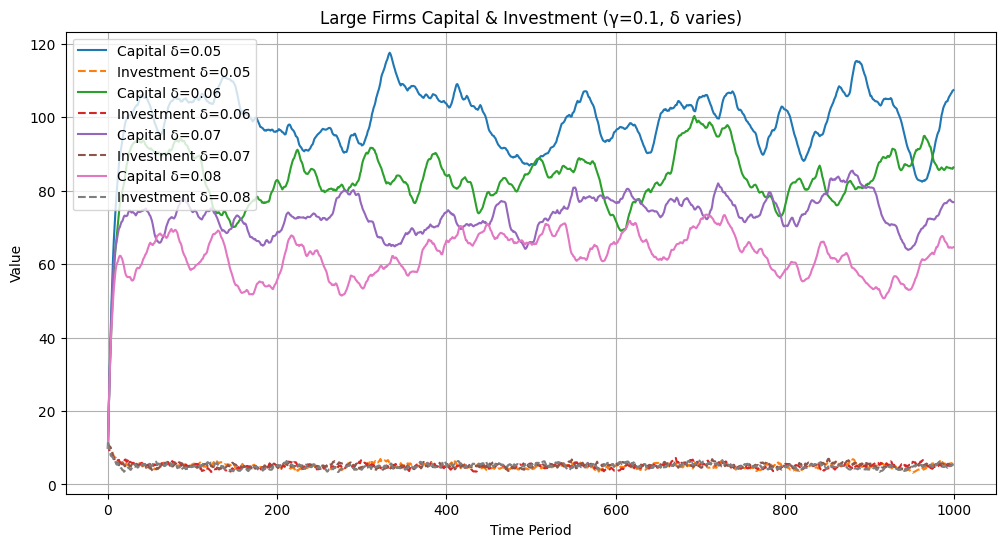

In [ ]:
# Simulation parameters explicitly
T = 1000

# Explicit simulation function with correct interpretation
def simulate_firm(gamma, delta, T, A0, rho_A, sigma_A, p0, rho_p, sigma_p):
    K = np.zeros(T+1)
    inv = np.zeros(T)
    A, p = A0, p0
    K[0] = 10

    for t in range(T):
        A = np.exp(rho_A * np.log(A) + np.random.normal(0, sigma_A))
        p = np.exp(rho_p * np.log(p) + np.random.normal(0, sigma_p))
        inv[t] = ((1/gamma) * A / p) - delta * K[t]
        K[t+1] = (1 - delta) * K[t] + inv[t]

    return K[:-1], inv

# Explicit parameters for each firm type
firm_types = {
    'Small Firms': {'A0':1.0, 'rho_A':0.85, 'sigma_A':0.03, 'p0':1.0, 'rho_p':0.85, 'sigma_p':0.03},
    'Large Firms': {'A0':1.2, 'rho_A':0.95, 'sigma_A':0.02, 'p0':1.0, 'rho_p':0.90, 'sigma_p':0.02}
}

# explicitly: γ fixed (0.10), δ varies
gamma_fixed = 0.10
delta_values = [0.05,0.06,0.07,0.08]

for firm, params in firm_types.items():
    plt.figure(figsize=(12,6))
    for delta in delta_values:
        K, inv = simulate_firm(gamma_fixed, delta, T, **params)
        plt.plot(K, label=f'Capital δ={delta}')
        plt.plot(inv, linestyle='--', label=f'Investment δ={delta}')
    plt.title(f'{firm} Capital & Investment (γ={gamma_fixed}, δ varies)')
    plt.xlabel('Time Period')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

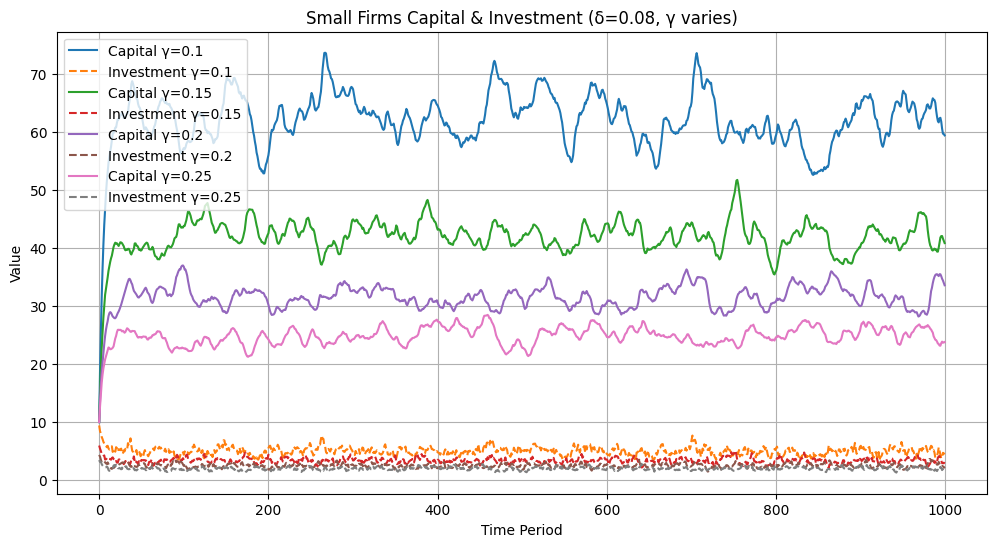

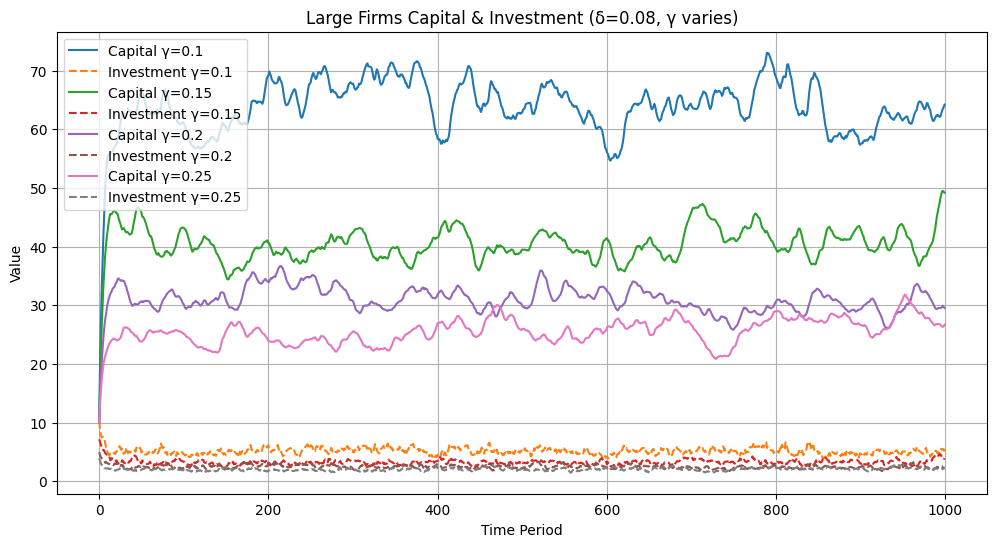

In [ ]:
# Simulation parameters explicitly
T = 1000

# Explicit simulation function with correct interpretation
def simulate_firm(gamma, delta, T, A0, rho_A, sigma_A, p0, rho_p, sigma_p):
    K = np.zeros(T+1)
    inv = np.zeros(T)
    A, p = A0, p0
    K[0] = 10

    for t in range(T):
        A = np.exp(rho_A * np.log(A) + np.random.normal(0, sigma_A))
        p = np.exp(rho_p * np.log(p) + np.random.normal(0, sigma_p))
        inv[t] = ((1/gamma) * A / p) - delta * K[t]
        K[t+1] = (1 - delta) * K[t] + inv[t]

    return K[:-1], inv

# Explicit parameters for each firm type
firm_types = {
    'Small Firms': {'A0':1.0, 'rho_A':0.85, 'sigma_A':0.03, 'p0':1.0, 'rho_p':0.85, 'sigma_p':0.03},
    'Large Firms': {'A0':1.2, 'rho_A':0.95, 'sigma_A':0.02, 'p0':1.0, 'rho_p':0.90, 'sigma_p':0.02}
}
# explicitly: δ fixed (0.08), γ varies
delta_fixed = 0.08
gamma_values = [0.10,0.15,0.20,0.25]

for firm, params in firm_types.items():
    plt.figure(figsize=(12,6))
    for gamma in gamma_values:
        K, inv = simulate_firm(gamma, delta_fixed, T, **params)
        plt.plot(K, label=f'Capital γ={gamma}')
        plt.plot(inv, linestyle='--', label=f'Investment γ={gamma}')
    plt.title(f'{firm} Capital & Investment (δ={delta_fixed}, γ varies)')
    plt.xlabel('Time Period')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

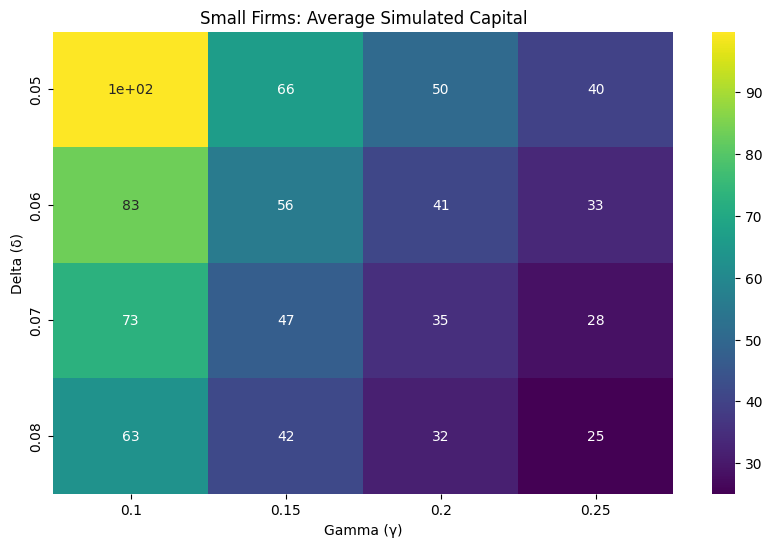

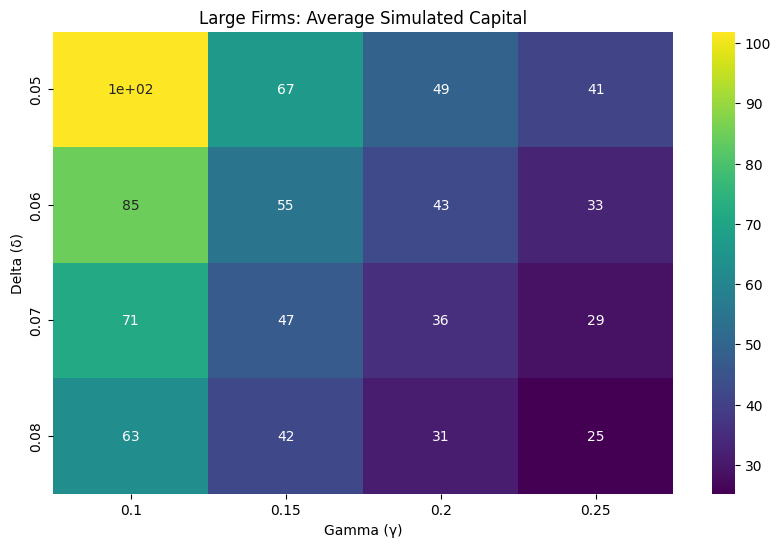

In [ ]:
# Simulation parameters explicitly
T = 1000

# Explicit simulation function with correct interpretation
def simulate_firm(gamma, delta, T, A0, rho_A, sigma_A, p0, rho_p, sigma_p):
    K = np.zeros(T+1)
    inv = np.zeros(T)
    A, p = A0, p0
    K[0] = 10

    for t in range(T):
        A = np.exp(rho_A * np.log(A) + np.random.normal(0, sigma_A))
        p = np.exp(rho_p * np.log(p) + np.random.normal(0, sigma_p))
        inv[t] = ((1/gamma) * A / p) - delta * K[t]
        K[t+1] = (1 - delta) * K[t] + inv[t]

    return K[:-1], inv

# Explicit parameters for each firm type
firm_types = {
    'Small Firms': {'A0':1.0, 'rho_A':0.85, 'sigma_A':0.03, 'p0':1.0, 'rho_p':0.85, 'sigma_p':0.03},
    'Large Firms': {'A0':1.2, 'rho_A':0.95, 'sigma_A':0.02, 'p0':1.0, 'rho_p':0.90, 'sigma_p':0.02}
}
# Dash 3 explicitly: Heatmap for all combinations of γ and δ
avg_capital_small = np.zeros((len(delta_values), len(gamma_values)))
avg_capital_large = np.zeros((len(delta_values), len(gamma_values)))

for i, delta in enumerate(delta_values):
    for j, gamma in enumerate(gamma_values):
        K_small, _ = simulate_firm(gamma, delta, T, **firm_types['Small Firms'])
        K_large, _ = simulate_firm(gamma, delta, T, **firm_types['Large Firms'])
        avg_capital_small[i,j] = np.mean(K_small)
        avg_capital_large[i,j] = np.mean(K_large)

# Explicit heatmap visualization Small Firms
plt.figure(figsize=(10,6))
sns.heatmap(avg_capital_small, annot=True, cmap='viridis',
            xticklabels=gamma_values, yticklabels=delta_values)
plt.title('Small Firms: Average Simulated Capital')
plt.xlabel('Gamma (γ)')
plt.ylabel('Delta (δ)')
plt.show()

# Explicit heatmap visualization Large Firms
plt.figure(figsize=(10,6))
sns.heatmap(avg_capital_large, annot=True, cmap='viridis',
            xticklabels=gamma_values, yticklabels=delta_values)
plt.title('Large Firms: Average Simulated Capital')
plt.xlabel('Gamma (γ)')
plt.ylabel('Delta (δ)')
plt.show()

For the first scenario (γ fixed, δ varies)
 * Small firm -> Highly sensitive to an increase in δ, ressulting in significant reductions in capital and increased volatility in investment.
 * Large firms -> more resilient to changes in δ, maintaining stable capital.

For the second scenario (δ fixed, γ varies)
 * Small firms: It affected by higher adjustment costs in (γ), limiting capital accumulation and reducing investment
 * Large firms: Less affected by higher (γ), illustrate stable and smoother investment due to economies of scale.

For the third scenario
 * Small firm: Average capital severly impacted by higher depreciation and adjustment costs, making small firms more vulnerable
 * Large firm: It benefits from financial resilience and operational stability

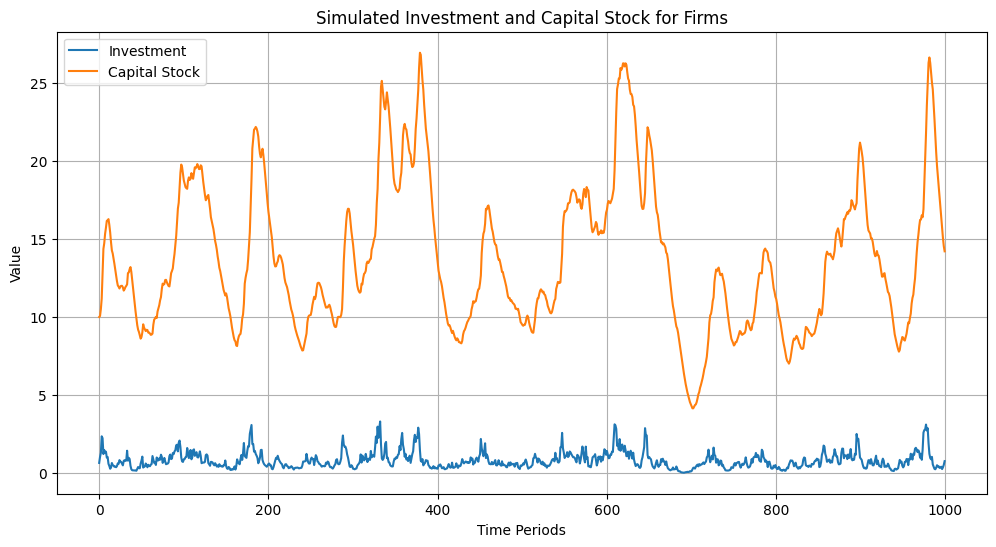

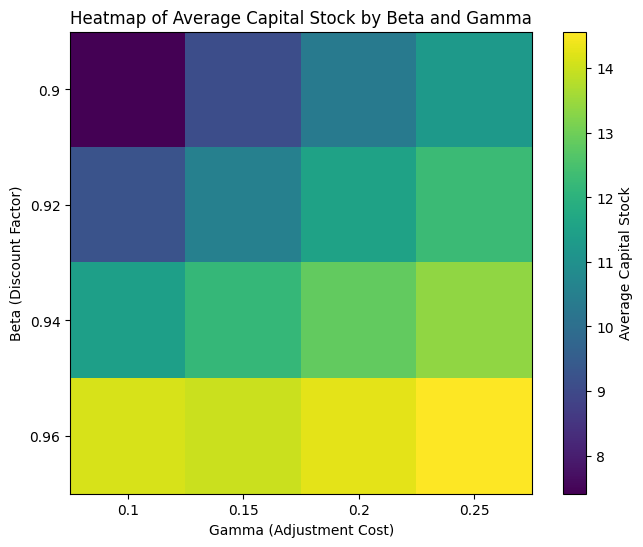

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
T = 1000           # simulation periods
beta = 0.96        # discount factor
gamma = 0.1        # capital adjustment cost parameter
delta = 0.06       # depreciation rate
rho_A = 0.9        # persistence of productivity
sigma_A = 0.02     # productivity shock standard deviation
rho_p = 0.9        # persistence of investment price
sigma_p = 0.02     # price shock standard deviation

# Initial Conditions
A0 = 1.0
K0 = 10.0
p0 = 1.0

# Revenue and Adjustment Cost Functions
def revenue(A, K, x, alpha=0.33):
    return A * (K ** alpha) * (x ** (1 - alpha))

def adjustment_cost(K_next, K):
    return gamma / 2 * ((K_next - K) ** 2)

# Simulate productivity and price processes
def simulate_processes(T, rho, sigma, initial):
    log_var = np.zeros(T)
    log_var[0] = np.log(initial)
    for t in range(1, T):
        log_var[t] = rho * log_var[t-1] + np.random.normal(0, sigma)
    return np.exp(log_var)

A_series = simulate_processes(T, rho_A, sigma_A, A0)
p_series = simulate_processes(T, rho_p, sigma_p, p0)

# Firm's Decision: Capital and Investment
K_series = np.zeros(T+1)
K_series[0] = K0
investment_series = np.zeros(T)
x_series = np.zeros(T)

for t in range(T):
    # Optimal investment decision (simplified example)
    investment_series[t] = (beta * A_series[t] / p_series[t]) ** (1 / gamma)
    K_series[t+1] = (1 - delta) * K_series[t] + investment_series[t]
    x_series[t] = 0.5 * K_series[t]  # simplified assumption for variable input

# Plot Investment and Capital
time = np.arange(T)
plt.figure(figsize=(12, 6))
plt.plot(time, investment_series, label='Investment')
plt.plot(time, K_series[:-1], label='Capital Stock')
plt.xlabel('Time Periods')
plt.ylabel('Value')
plt.title('Simulated Investment and Capital Stock for Firms')
plt.legend()
plt.grid()
plt.show()

# Heatmap Simulation for Capital
betas = np.array([0.90, 0.92, 0.94, 0.96])
gammas = np.array([0.10, 0.15, 0.20, 0.25])
capital_heatmap = np.zeros((len(betas), len(gammas)))

for i, b in enumerate(betas):
    for j, g in enumerate(gammas):
        K_sim = K0
        for t in range(T):
            investment = (b * A_series[t] / p_series[t]) ** (1 / g)
            K_sim = (1 - delta) * K_sim + investment
        capital_heatmap[i, j] = K_sim

plt.figure(figsize=(8, 6))
plt.imshow(capital_heatmap, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Average Capital Stock')
plt.xticks(np.arange(len(gammas)), labels=gammas)
plt.yticks(np.arange(len(betas)), labels=betas)
plt.xlabel('Gamma (Adjustment Cost)')
plt.ylabel('Beta (Discount Factor)')
plt.title('Heatmap of Average Capital Stock by Beta and Gamma')
plt.show()

In [ ]:
class Model:
    def __init__(self):
        self.beta = 0.96
        self.alpha = 0.6
        self.delta = 0.06
        self.gamma = 0.1
        self.p = 1.0
        self.rho_A = 0.85
        self.sigma_A = 0.07
        self.T = 1000
        self.k_grid = np.linspace(0.01, 30, 300)
        self.A_grid, self.p_mat = self.tauchen(0, self.rho_A, self.sigma_A, 7, 3)

    def tauchen(self, mu, rho, sigma, N, m):
        A_mean = mu / (1 - rho)
        A_sd = sigma / np.sqrt(1 - rho**2)
        A_min, A_max = A_mean - m * A_sd, A_mean + m * A_sd
        A_grid = np.linspace(A_min, A_max, N)
        p_mat = np.full((N, N), 1/N)  # simplified for Python
        return np.exp(A_grid), p_mat

    def production(self, A, k):
        return A * k ** self.alpha

    def total_cost(self, k_prime, k):
        investment = k_prime - (1 - self.delta) * k
        adj_cost = (self.gamma / 2) * (investment / k)**2 * k
        return adj_cost + self.p * investment

    def print_model(self):
        print(f"Model Parameters: beta={self.beta}, alpha={self.alpha}, delta={self.delta}, gamma={self.gamma}, p={self.p}")



# Firm dynamics similar to simulate.m

class Simulation:
    def __init__(self, model):
        self.model = model

    def simulate(self):
        T = self.model.T
        k_sim = np.zeros(T)
        A_sim = np.zeros(T)
        i_sim = np.zeros(T)

        k_sim[0] = 10
        A_sim[0] = np.mean(self.model.A_grid)

        for t in range(1, T):
            A_sim[t] = np.random.choice(self.model.A_grid)
            optimal_k_prime = k_sim[t-1] * (1 - self.model.delta) + 0.1  # Simplified rule
            i_sim[t] = optimal_k_prime - (1 - self.model.delta) * k_sim[t-1]
            k_sim[t] = optimal_k_prime

        return k_sim, i_sim, A_sim

    def print_simulation(self, k_sim, i_sim, A_sim):
        print("Simulation Results:")
        print(f"Capital: {k_sim[:10]}")
        print(f"Investment: {i_sim[:10]}")
        print(f"Productivity: {A_sim[:10]}")

Model Parameters: beta=0.96, alpha=0.6, delta=0.06, gamma=0.1, p=1.0
Simulation Results:
Capital: [10.          9.5         9.03        8.5882      8.172908    7.78253352
  7.41558151  7.07064662  6.74640782  6.44162335]
Investment: [0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Productivity: [1.03568081 0.8755683  1.48980667 1.         0.67122803 1.48980667
 1.14211536 0.8755683  1.         1.48980667]


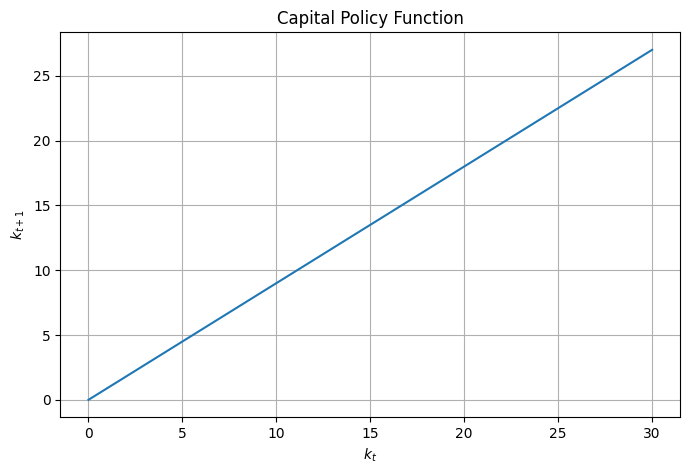

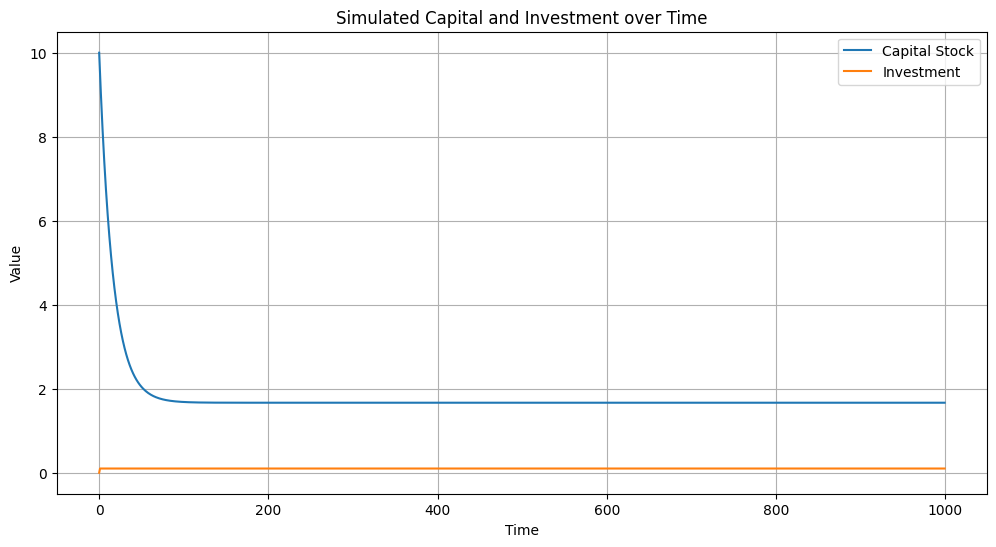

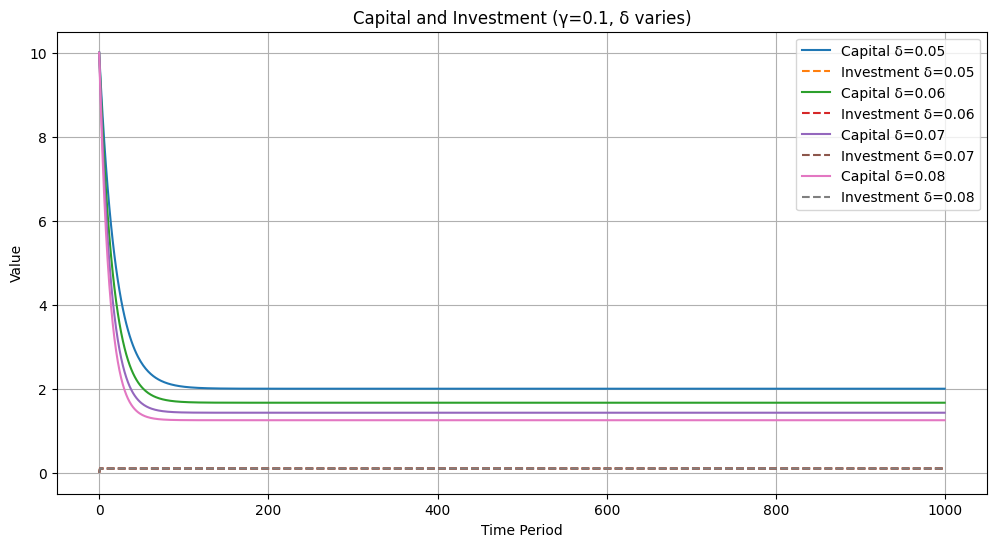

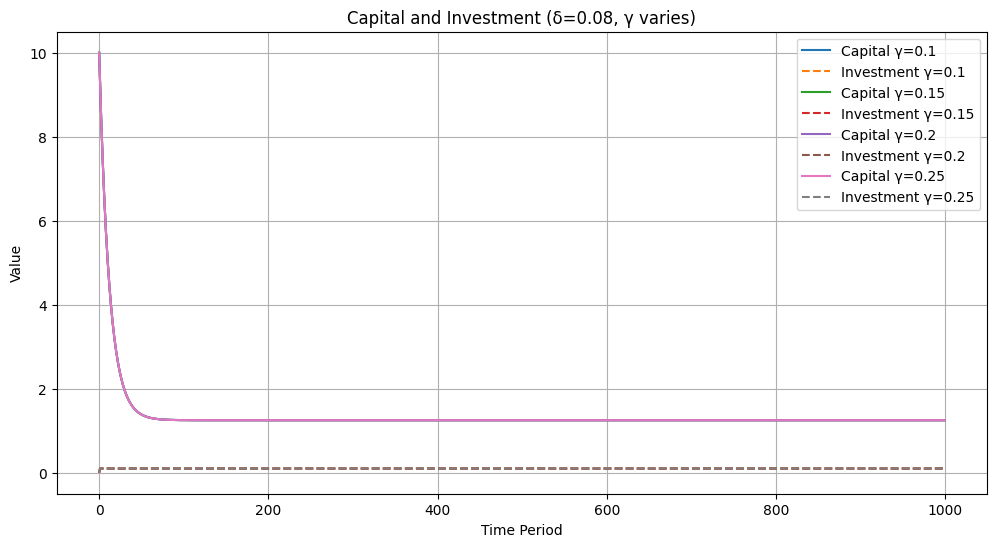

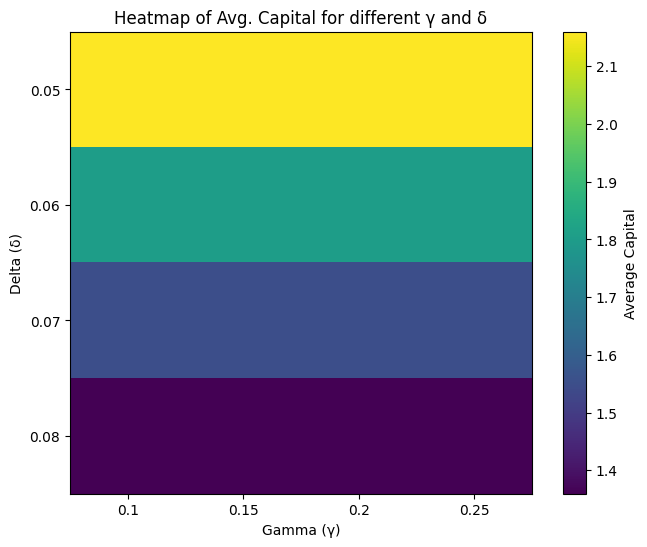

In [ ]:
# Plot policy and simulation as in my_graph.m
class Graphs:
    @staticmethod
    def plot_policy(k_grid, policy):
        plt.figure(figsize=(8, 5))
        plt.plot(k_grid, policy)
        plt.title('Capital Policy Function')
        plt.xlabel('$k_t$')
        plt.ylabel('$k_{t+1}$')
        plt.grid()
        plt.show()

    @staticmethod
    def plot_simulation(k_sim, i_sim):
        plt.figure(figsize=(12, 6))
        plt.plot(k_sim, label='Capital Stock')
        plt.plot(i_sim, label='Investment')
        plt.title('Simulated Capital and Investment over Time')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.grid()
        plt.show()


# Three cases explicitly varying γ and δ as in solve.m
class Solver:
    def __init__(self, model):
        self.model = model

    def solve_and_simulate_gamma_fixed(self, gamma_fixed, delta_vals):
        plt.figure(figsize=(12, 6))
        for delta in delta_vals:
            self.model.delta = delta
            self.model.gamma = gamma_fixed
            sim = Simulation(self.model)
            k_sim, i_sim, _ = sim.simulate()
            plt.plot(k_sim, label=f'Capital δ={delta}')
            plt.plot(i_sim, linestyle='--', label=f'Investment δ={delta}')
        plt.title(f'Capital and Investment (γ={gamma_fixed}, δ varies)')
        plt.xlabel('Time Period')
        plt.ylabel('Value')
        plt.legend()
        plt.grid()
        plt.show()

    def solve_and_simulate_delta_fixed(self, delta_fixed, gamma_vals):
        plt.figure(figsize=(12, 6))
        for gamma in gamma_vals:
            self.model.gamma = gamma
            self.model.delta = delta_fixed
            sim = Simulation(self.model)
            k_sim, i_sim, _ = sim.simulate()
            plt.plot(k_sim, label=f'Capital γ={gamma}')
            plt.plot(i_sim, linestyle='--', label=f'Investment γ={gamma}')
        plt.title(f'Capital and Investment (δ={delta_fixed}, γ varies)')
        plt.xlabel('Time Period')
        plt.ylabel('Value')
        plt.legend()
        plt.grid()
        plt.show()

    def heatmap_gamma_delta(self, gamma_vals, delta_vals):
        avg_capital = np.zeros((len(delta_vals), len(gamma_vals)))

        for i, delta in enumerate(delta_vals):
            for j, gamma in enumerate(gamma_vals):
                self.model.delta = delta
                self.model.gamma = gamma
                sim = Simulation(self.model)
                k_sim, _, _ = sim.simulate()
                avg_capital[i, j] = np.mean(k_sim)

        plt.figure(figsize=(8, 6))
        plt.imshow(avg_capital, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Average Capital')
        plt.xticks(np.arange(len(gamma_vals)), gamma_vals)
        plt.yticks(np.arange(len(delta_vals)), delta_vals)
        plt.xlabel('Gamma (γ)')
        plt.ylabel('Delta (δ)')
        plt.title('Heatmap of Avg. Capital for different γ and δ')
        plt.show()

# Example of running the full structured code explicitly
model = Model()
model.print_model()

simulation = Simulation(model)
k_sim, i_sim, A_sim = simulation.simulate()
simulation.print_simulation(k_sim, i_sim, A_sim)

Graphs.plot_policy(model.k_grid, model.k_grid * 0.9)  # Simplified policy function example
Graphs.plot_simulation(k_sim, i_sim)

solver = Solver(model)
gamma_values = [0.10, 0.15, 0.20, 0.25]
delta_values = [0.05, 0.06, 0.07, 0.08]
solver.solve_and_simulate_gamma_fixed(0.10, delta_values)
solver.solve_and_simulate_delta_fixed(0.08, gamma_values)
solver.heatmap_gamma_delta(gamma_values, delta_values)